In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay

In [3]:
pathg = '/mnt/Dati/CTA_DATA_EXT/data/interp/gamma-diffuse_20deg_180deg_runs441-450___cta-prod3-demo-2147m-LaPalma-baseline-mono_interp.h5'
pathp = '/mnt/Dati/CTA_DATA_EXT/data/interp/proton_20deg_180deg_runs1141-1150___cta-prod3-demo-2147m-LaPalma-baseline-mono_interp.h5'

In [4]:
fileg = h5py.File(pathg, 'r')
print(list(fileg.keys()))
LSTg = fileg['LST']
print(list(LSTg.keys()))

['Event_Info', 'LST']
['LST_event_index', 'LST_image_charge', 'LST_image_charge_interp', 'LST_image_peak_times', 'LST_image_peak_times_interp', 'intensities', 'intensities_width_2']


In [5]:
intens_noclean = np.sum( LSTg['LST_image_charge'][:], axis=1 )

In [6]:
gintens_cut = 5000
gintensities = LSTg['intensities'][:]
gleakage2 = LSTg['intensities_width_2'][:]
gevent_index = LSTg['LST_event_index'][:][(gintensities>gintens_cut)&(gleakage2<0.2)]
ginterp_crg = LSTg['LST_image_charge_interp'][:][(gintensities>gintens_cut)&(gleakage2<0.2)]
gorig_crg = LSTg['LST_image_charge'][:][(gintensities>gintens_cut)&(gleakage2<0.2)]
gorig_time = LSTg['LST_image_peak_times'][:][(gintensities>gintens_cut)&(gleakage2<0.2)]
ginterp_time = LSTg['LST_image_peak_times_interp'][:][(gintensities>gintens_cut)&(gleakage2<0.2)]
glbl = [0]*len(ginterp_crg)

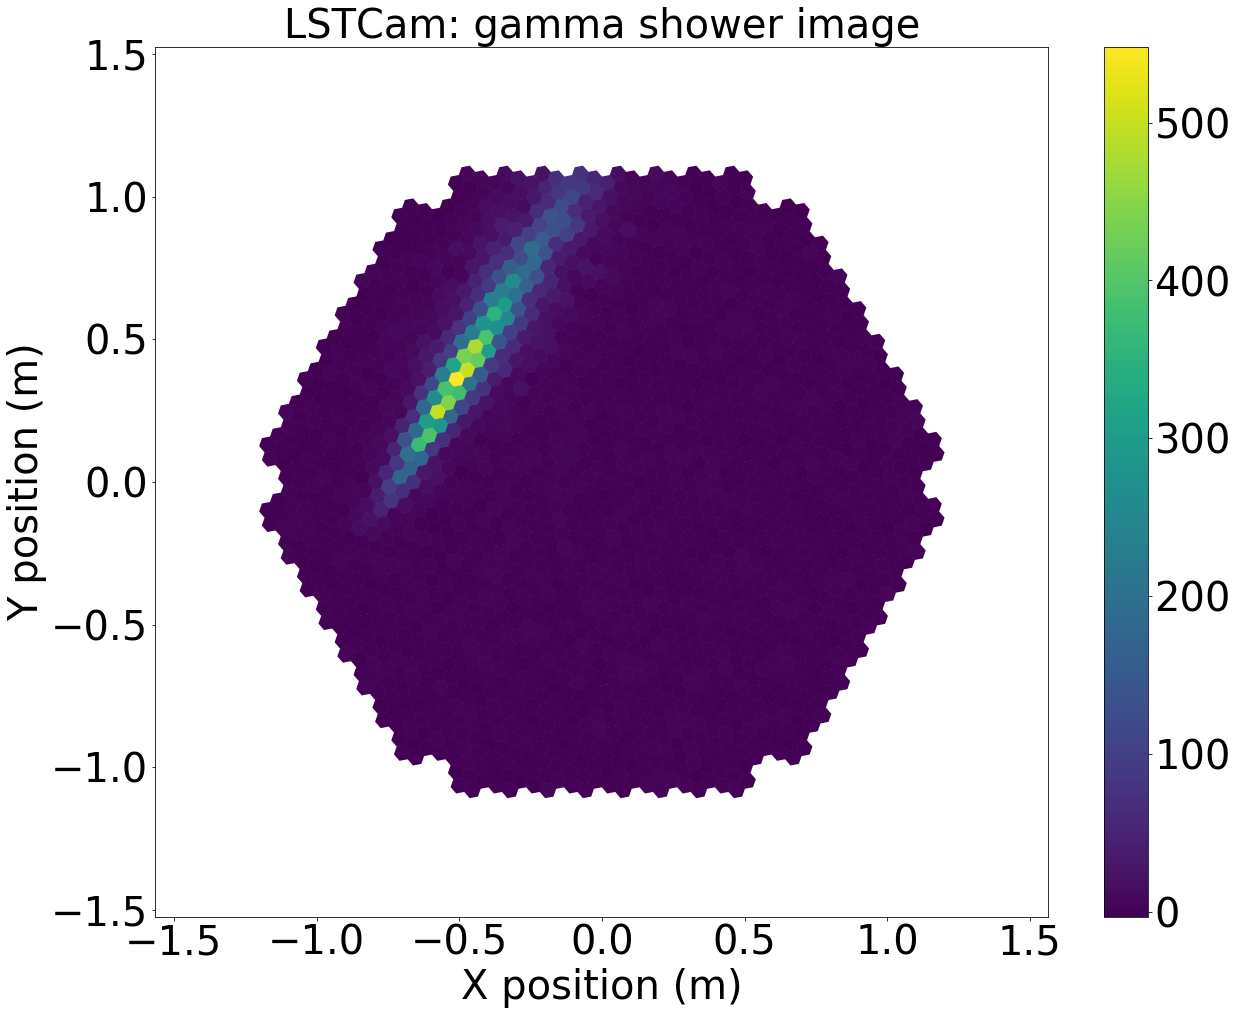

'\nfor i in range(len(gorig_crg)):\n\n    display.image = gorig_crg[i]\n    #plt.show()\n    plt.savefig("/mnt/Dati/CTA_DATA_EXT/data/orig/fig_gamma/gamma_{}.png".format(i))\n'

In [7]:
fsize = 40

cam = CameraGeometry.from_name('LSTCam')
fig = plt.figure(figsize=(20, 16))
fig.tight_layout()
matplotlib.rcParams.update({'font.size': fsize})
matplotlib.rcParams.update({'axes.labelsize': fsize})
display = CameraDisplay(cam)
display.add_colorbar()
plt.xlabel("X position (m)", fontsize=fsize)
plt.ylabel("Y position (m)", fontsize=fsize)
plt.title("LSTCam: gamma shower image", fontsize=fsize)

#plt.tick_params(labelsize=20)
#display.autoscale
#fig.tight_layout(

i=36
display.image = gorig_crg[i]
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/gamma_{}.pdf".format(i), bbox_inches='tight')
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/gamma_{}.png".format(i), bbox_inches='tight')


plt.show()
'''
for i in range(len(gorig_crg)):

    display.image = gorig_crg[i]
    #plt.show()
    plt.savefig("/mnt/Dati/CTA_DATA_EXT/data/orig/fig_gamma/gamma_{}.png".format(i))
'''


In [8]:
filep = h5py.File(pathp, 'r')
print(list(filep.keys()))
LSTp = filep['LST']
print(list(LSTp.keys()))

['Event_Info', 'LST']
['LST_event_index', 'LST_image_charge', 'LST_image_charge_interp', 'LST_image_peak_times', 'LST_image_peak_times_interp', 'delta_alt', 'delta_az', 'intensities', 'intensities_width_2']


In [9]:
pintens_cut = 5000
pintensities = LSTp['intensities'][:]
pleakage2 = LSTp['intensities_width_2'][:]
pevent_index = LSTp['LST_event_index'][:][(pintensities>pintens_cut)&(pleakage2<0.2)]
pinterp_crg = LSTp['LST_image_charge_interp'][:][(pintensities>pintens_cut)&(pleakage2<0.2)]
porig_crg = LSTp['LST_image_charge'][:][(pintensities>pintens_cut)&(pleakage2<0.2)]
pinterp_time = LSTp['LST_image_peak_times_interp'][:][(pintensities>pintens_cut)&(pleakage2<0.2)]
plbl = [0]*len(pinterp_crg)

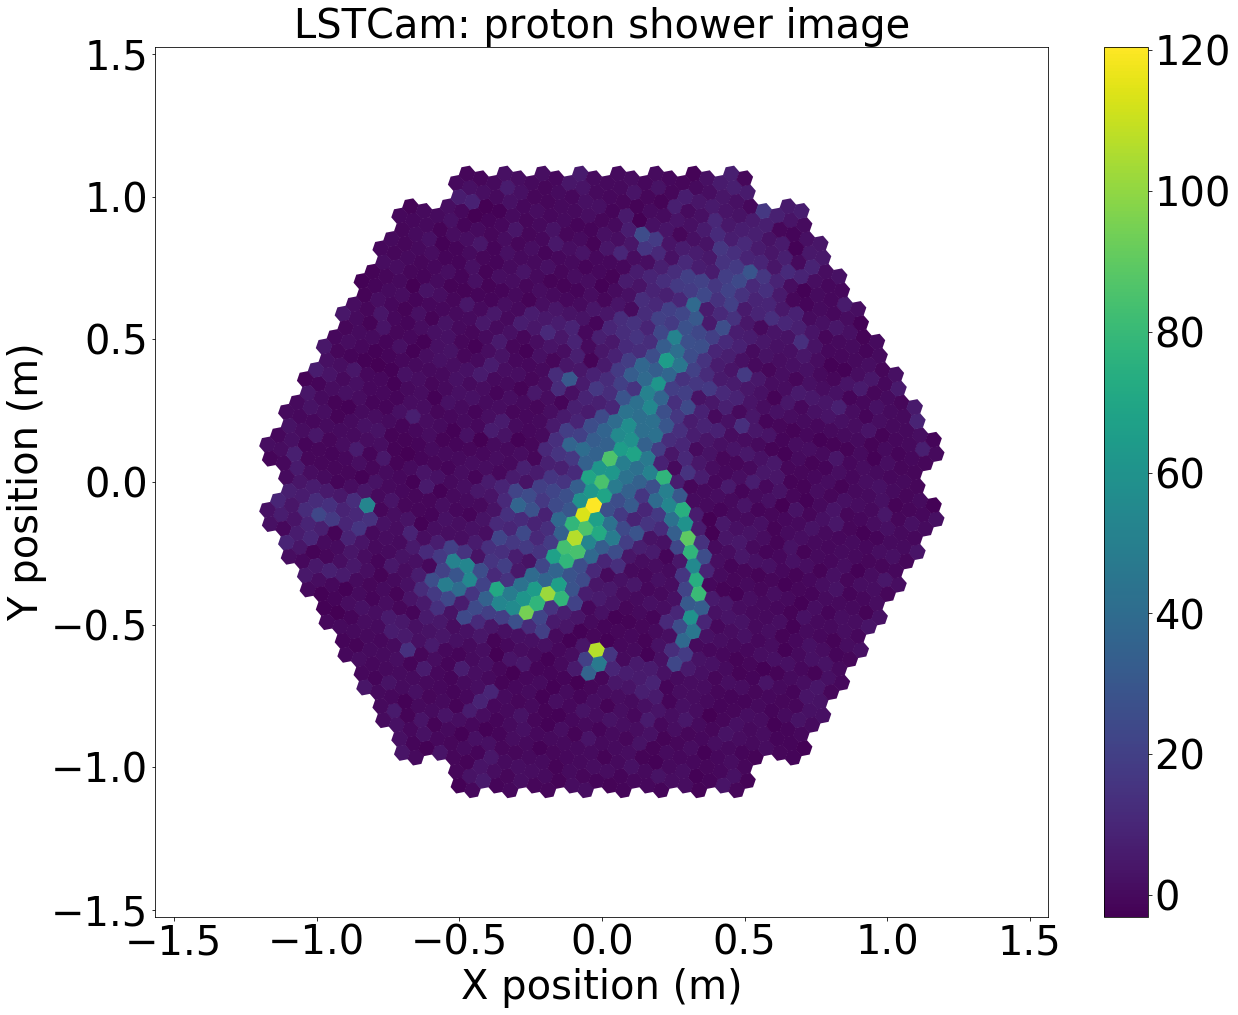

'\nfor i in range(len(porig_crg)):\n\n    display.image = porig_crg[i]\n    #plt.show()\n    plt.savefig("/mnt/Dati/CTA_DATA_EXT/data/orig/fig_proton/proton_{}.png".format(i))\n'

In [10]:
cam = CameraGeometry.from_name('LSTCam')
fig = plt.figure(figsize=(20, 16))
fig.tight_layout()

matplotlib.rcParams.update({'font.size': fsize})
matplotlib.rcParams.update({'axes.labelsize': fsize})
display = CameraDisplay(cam)
display.add_colorbar()


plt.xlabel("X position (m)", fontsize=fsize)
plt.ylabel("Y position (m)", fontsize=fsize)
plt.title("LSTCam: proton shower image", fontsize=fsize)

#display.autoscale
#fig.tight_layout(

i=19
display.image = porig_crg[i]
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/proton_{}.pdf".format(i), bbox_inches='tight')
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/proton_{}.png".format(i), bbox_inches='tight')

plt.show()
'''
for i in range(len(porig_crg)):

    display.image = porig_crg[i]
    #plt.show()
    plt.savefig("/mnt/Dati/CTA_DATA_EXT/data/orig/fig_proton/proton_{}.png".format(i))
'''



drago = []
for i in range(10):
    prova = LST['LST_image_charge_interp'][i]
    drago.append(prova)
drago = np.array(drago).reshape(-1,96,88,1)
print(drago.shape)
drago = drago.reshape(-1,96,88)
print(drago.shape)#print(drago.shape, drago.shape[1], drago.shape[2])
#for d in drago:
#    print(d.shape)

In [12]:
cam = CameraGeometry.from_name('LSTCam')
x = cam.pix_x
y = cam.pix_y
points = np.array([np.array(x),
                   np.array(y)]).T


fig_org = plt.figure(figsize=(15, 12))
fig_interp = plt.figure(figsize=(12, 12))
fig_org.tight_layout()

<Figure size 1080x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [19]:
print(x.max(), x.min())

1.171686293234585 m -1.171686293234585 m


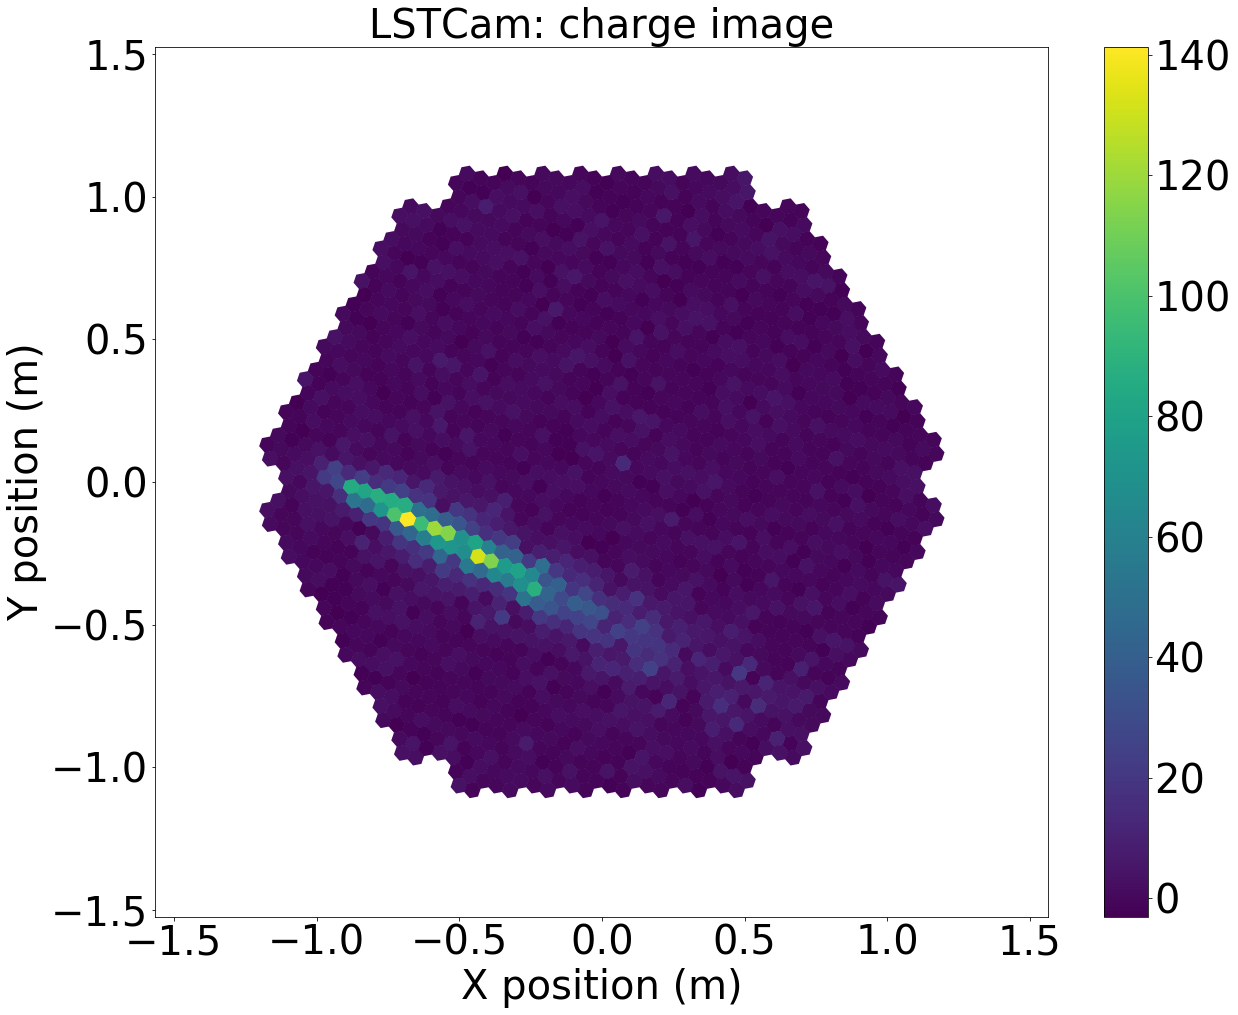

In [20]:
fsize=40

i=38

cam = CameraGeometry.from_name('LSTCam')
fig = plt.figure(figsize=(20, 16))
fig.tight_layout()
matplotlib.rcParams.update({'font.size': fsize})
matplotlib.rcParams.update({'axes.labelsize': fsize})
display = CameraDisplay(cam)
display.add_colorbar()
plt.xlabel("X position (m)", fontsize=fsize)
plt.ylabel("Y position (m)", fontsize=fsize)
plt.title("LSTCam: charge image", fontsize=fsize)
display.image = gorig_crg[i]
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/orig_crg.pdf", bbox_inches='tight')
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/orig_crg.png", bbox_inches='tight')
#plt.show()

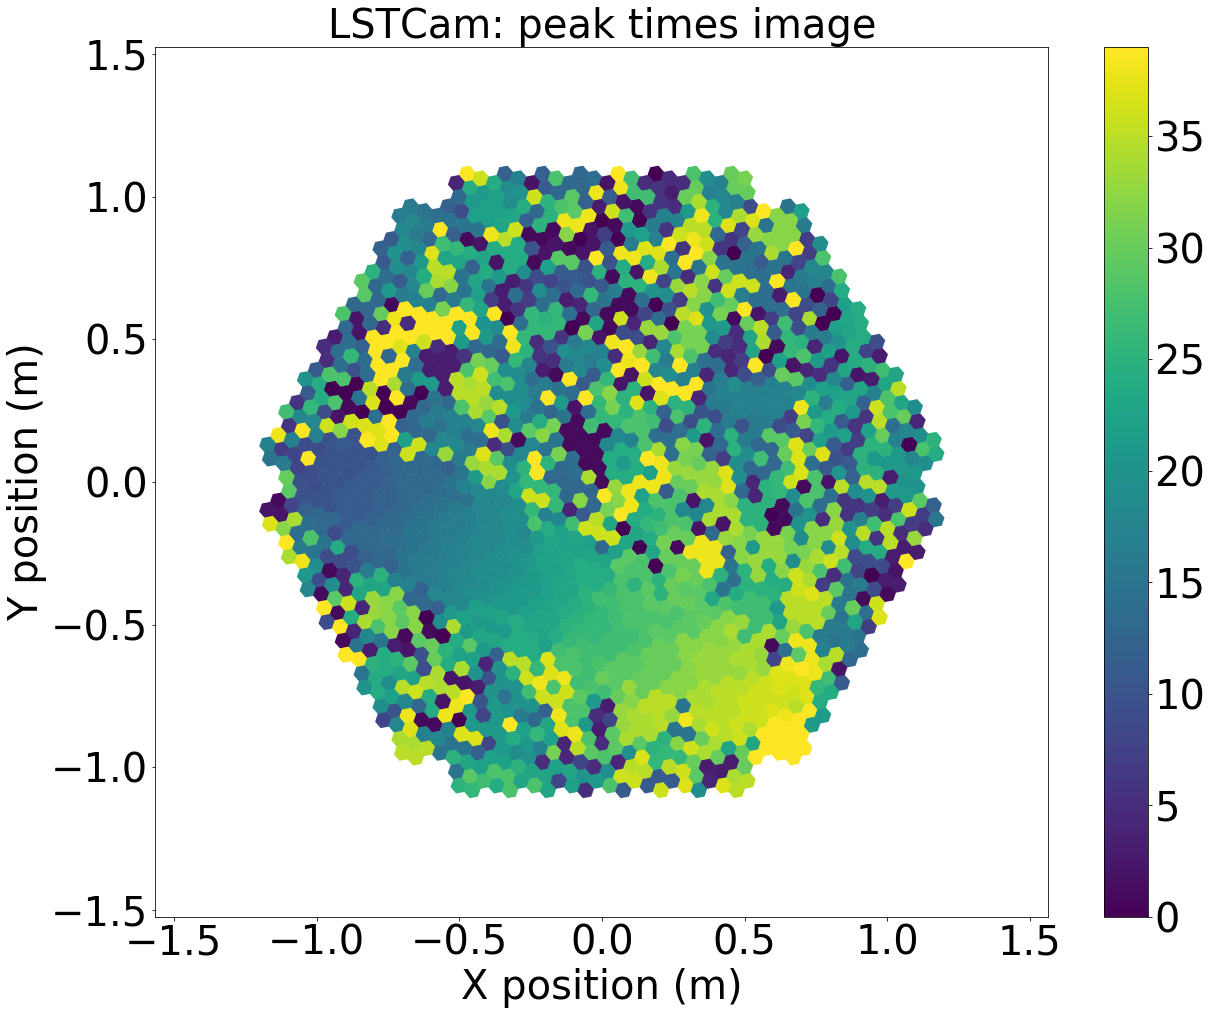

In [21]:
#i=36

cam = CameraGeometry.from_name('LSTCam')
fig = plt.figure(figsize=(20, 16))
fig.tight_layout()

matplotlib.rcParams.update({'font.size': fsize})
matplotlib.rcParams.update({'axes.labelsize': fsize})
display = CameraDisplay(cam)
display.add_colorbar()
plt.xlabel("X position (m)", fontsize=fsize)
plt.ylabel("Y position (m)", fontsize=fsize)
plt.title("LSTCam: peak times image", fontsize=fsize)

display.image = gorig_time[i]
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/orig_time.pdf", bbox_inches='tight')
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/orig_time.png", bbox_inches='tight')
#plt.show()

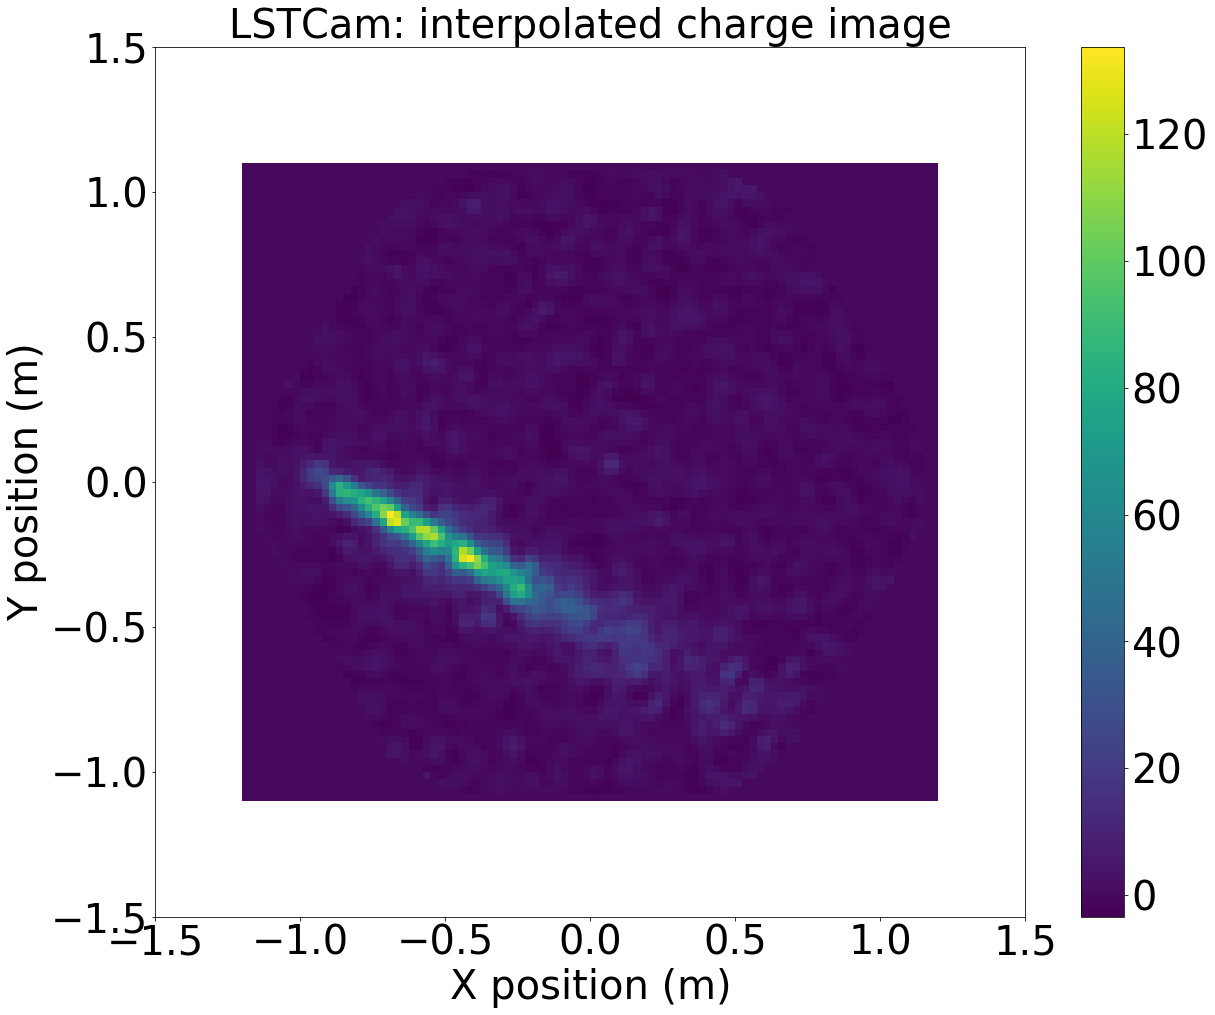

In [22]:
fig_interp = plt.figure(figsize=(20, 16))
fig_interp.tight_layout()
matplotlib.rcParams.update({'font.size': fsize})
matplotlib.rcParams.update({'axes.labelsize': fsize})
plt.title("LSTCam: interpolated charge image", fontsize=fsize)

plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.xlabel("X position (m)", fontsize=fsize)
plt.ylabel("Y position (m)", fontsize=fsize)
sc = plt.imshow(ginterp_crg[i].T, extent=(-1.2, 1.2, -1.1, 1.1), origin='lower')
clb = plt.colorbar(sc)
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/interp_crg.pdf", bbox_inches='tight')
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/interp_crg.png", bbox_inches='tight')
#plt.savefig("provaint.png")

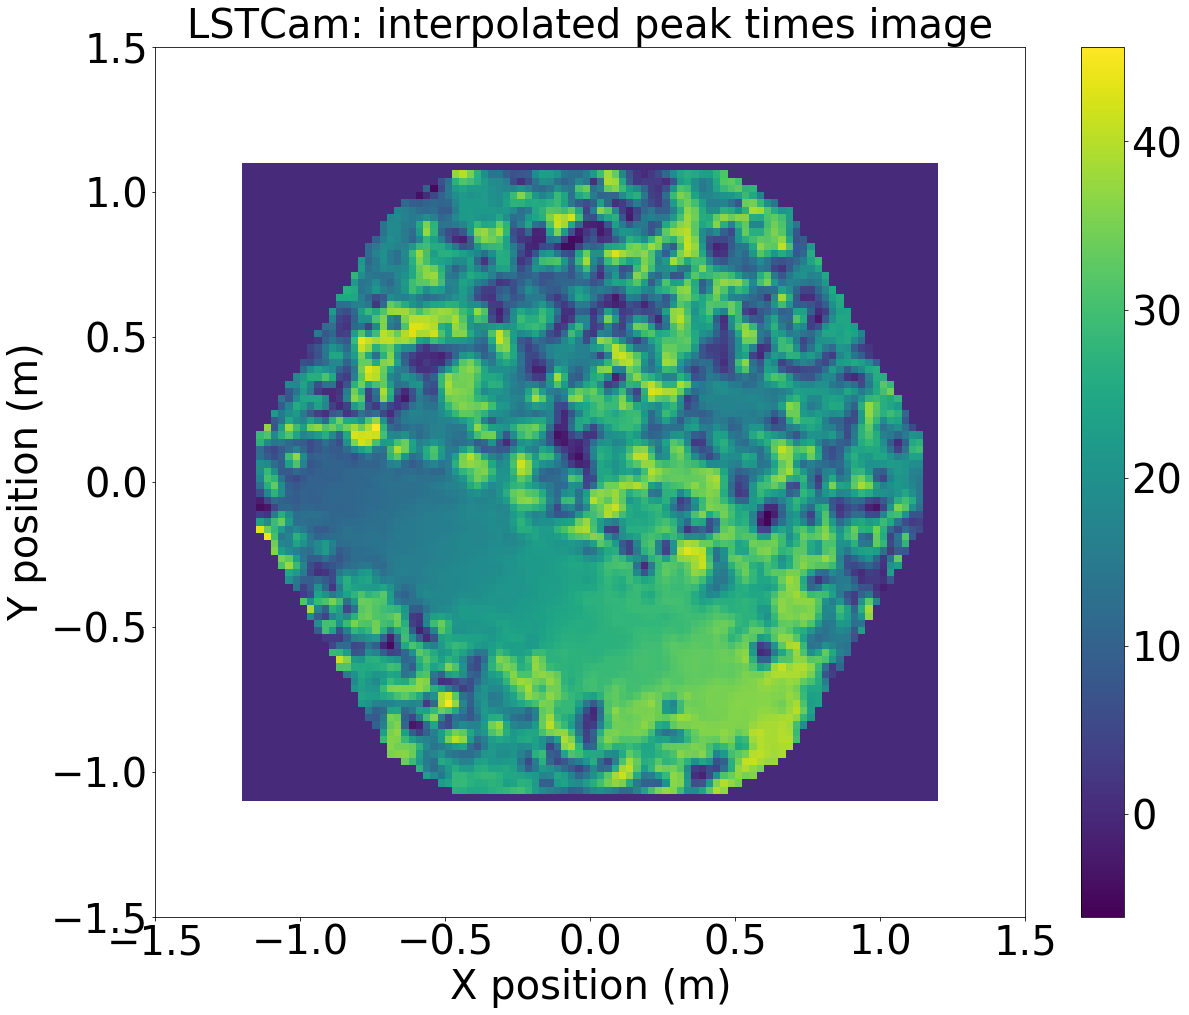

In [23]:
fig_interp = plt.figure(figsize=(20, 16))
fig_interp.tight_layout()
matplotlib.rcParams.update({'font.size': fsize})
matplotlib.rcParams.update({'axes.labelsize': fsize})
plt.title("LSTCam: interpolated peak times image", fontsize=fsize)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.xlabel("X position (m)", fontsize=fsize)
plt.ylabel("Y position (m)", fontsize=fsize)

sc = plt.imshow(ginterp_time[i].T, extent=(-1.2, 1.2, -1.1, 1.1), origin='lower')
clb = plt.colorbar(sc)
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/interp_time.pdf", bbox_inches='tight')
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/interp_time.png", bbox_inches='tight')
#plt.savefig("provaint.png")

In [86]:
mask = (gintensities>gintens_cut)&(gleakage2>0.5)&(gleakage2<0.6)
gevent_index_lkd = LSTg['LST_event_index'][:][mask]
ginterp_crg_lkd = LSTg['LST_image_charge_interp'][:][mask]
gorig_crg_lkd = LSTg['LST_image_charge'][:][mask]

In [85]:
len(gorig_crg_lkd)

9

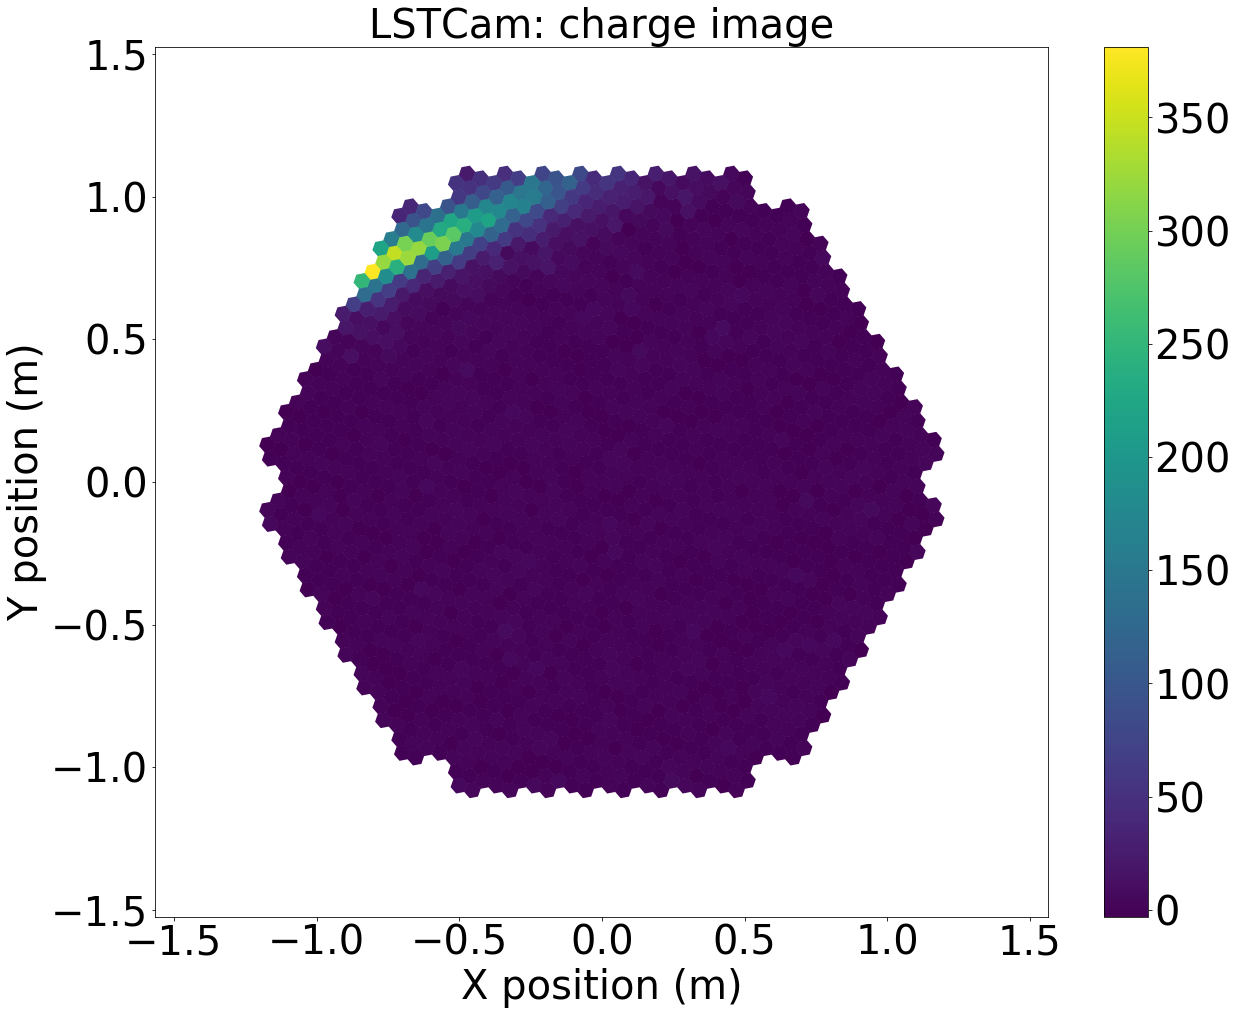

In [90]:
fsize=40

i=10

cam = CameraGeometry.from_name('LSTCam')
fig = plt.figure(figsize=(20, 16))
fig.tight_layout()
matplotlib.rcParams.update({'font.size': fsize})
matplotlib.rcParams.update({'axes.labelsize': fsize})
display = CameraDisplay(cam)
display.add_colorbar()
plt.xlabel("X position (m)", fontsize=fsize)
plt.ylabel("Y position (m)", fontsize=fsize)
plt.title("LSTCam: charge image", fontsize=fsize)
display.image = gorig_crg_lkd[i]
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/orig_crg_lkd.pdf", bbox_inches='tight')
plt.savefig("/mnt/Dati/CTA/PRESENTATION/fig/orig_crg_lkd.png", bbox_inches='tight')
#plt.show()

In [ ]:
for i, ele in enumerate(interp_crg):
    print(i, ele.shape)
    break

In [ ]:
zd = LST['delta_alt'][:]

In [ ]:
zd

In [ ]:
az = LST['delta_az'][:]

In [ ]:
fig = plt.figure(figsize=(10,10))
dir = plt.hist2d(zd,az, bins=200)

In [ ]:
d_squared = np.power(az,2) + np.power(zd,2)

In [ ]:
fig, ax = plt.subplots()
ax.hist(d_squared, bins=50)

In [ ]:
fig = plt.figure(figsize=(10,10))
dir = plt.hist2d(xc,yc, bins=200)

In [ ]:
n = 10000
xp = np.random.random_sample(n)
yp = np.random.random_sample(n)
zp = np.random.random_sample(n)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.arccos(xp),np.arcsin(yp), np. marker='o')

plt.show()